In [1]:
import pandas as pd
import numpy as np
import os
import json
import matplotlib.pyplot as plt
import warnings
import calendar
import seaborn as sns
import datetime
warnings.filterwarnings('ignore')

filepath_movies = '/home/dongho/Desktop/machine_learning_course/home_excercise/excercise_2/tmdb-5000-movie-dataset/tmdb_5000_movies.csv'
filepath_credit = '/home/dongho/Desktop/machine_learning_course/home_excercise/excercise_2/tmdb-5000-movie-dataset/tmdb_5000_credits.csv'
movies = pd.read_csv(filepath_movies)
credit = pd.read_csv(filepath_credit)

In [2]:
def load_tmdb_movies(path):
    data = pd.read_csv(path)
    data['release_date'] = pd.to_datetime(data['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries', 'production_companies', 'spoken_languages']
    for column in json_columns:
        data[column] = data[column].apply(json.loads)
    return data

def load_tmdb_credits(path):
    data = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        data[column] = data[column].apply(json.loads)
    return data

def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

In [3]:
credits = load_tmdb_credits(filepath_credit)
movies = load_tmdb_movies(filepath_movies)

In [4]:
del credits['title']
data = pd.concat([movies, credits], axis=1)

In [5]:
data.columns.tolist()

['budget',
 'genres',
 'homepage',
 'id',
 'keywords',
 'original_language',
 'original_title',
 'overview',
 'popularity',
 'production_companies',
 'production_countries',
 'release_date',
 'revenue',
 'runtime',
 'spoken_languages',
 'status',
 'tagline',
 'title',
 'vote_average',
 'vote_count',
 'movie_id',
 'cast',
 'crew']

In [6]:
data.head(4)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://www.avatarmovie.com/,19995,"[{'name': 'culture clash', 'id': 1463}, {'name...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,162.0,"[{'name': 'English', 'iso_639_1': 'en'}, {'nam...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{'order': 0, 'character': 'Jake Sully', 'cred...","[{'department': 'Editing', 'job': 'Editor', 'c..."
1,300000000,"[{'name': 'Adventure', 'id': 12}, {'name': 'Fa...",http://disney.go.com/disneypictures/pirates/,285,"[{'name': 'ocean', 'id': 270}, {'name': 'drug ...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,169.0,"[{'name': 'English', 'iso_639_1': 'en'}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{'order': 0, 'character': 'Captain Jack Sparr...","[{'department': 'Camera', 'job': 'Director of ..."
2,245000000,"[{'name': 'Action', 'id': 28}, {'name': 'Adven...",http://www.sonypictures.com/movies/spectre/,206647,"[{'name': 'spy', 'id': 470}, {'name': 'based o...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,148.0,"[{'name': 'Français', 'iso_639_1': 'fr'}, {'na...",Released,A Plan No One Escapes,Spectre,6.3,4466,206647,"[{'order': 0, 'character': 'James Bond', 'cred...","[{'department': 'Sound', 'job': 'Original Musi..."
3,250000000,"[{'name': 'Action', 'id': 28}, {'name': 'Crime...",http://www.thedarkknightrises.com/,49026,"[{'name': 'dc comics', 'id': 849}, {'name': 'c...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,165.0,"[{'name': 'English', 'iso_639_1': 'en'}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,49026,"[{'order': 0, 'character': 'Bruce Wayne / Batm...","[{'department': 'Sound', 'job': 'Original Musi..."


In [7]:
data['genres'] = data['genres'].apply(pipe_flatten_names)

In [8]:
liste_genres = set()
for s in data['genres'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres.remove('')

In [9]:
data['spoken_languages'] = data['spoken_languages'].apply(pipe_flatten_names)

In [10]:
liste_genres = set()
for s in data['spoken_languages'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres.remove('')

In [11]:
data['production_companies'] = data['production_companies'].apply(pipe_flatten_names)

In [12]:
liste_genres = set()
for s in data['production_companies'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres.remove('')

In [13]:
data['cast'] = data['cast'].apply(pipe_flatten_names)

In [14]:
liste_genres = set()
for s in data['cast'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres.remove('')

In [15]:
data['crew'] = data['crew'].apply(pipe_flatten_names)

In [16]:
liste_genres = set()
for s in data['crew'].str.split('|'):
    liste_genres = set().union(s, liste_genres)
liste_genres = list(liste_genres)
liste_genres.remove('')

In [17]:
data_reduced = data[['title','vote_average','release_date','runtime','budget','revenue','popularity','spoken_languages','production_companies','cast','crew']].reset_index(drop=True)

In [18]:
year = pd.DatetimeIndex(data['release_date']).year
month = pd.DatetimeIndex(data['release_date']).month
data_reduced['release_year'] = year 
data_reduced.head(2)

,title,vote_average,release_date,runtime,budget,revenue,popularity,spoken_languages,production_companies,cast,crew,release_year
0,Avatar,7.2,2009-12-10,162.0,237000000,2787965087,150.437577,English|Español,Ingenious Film Partners|Twentieth Century Fox ...,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Stephen E. Rivkin|Rick Carter|Christopher Boye...,2009.0
1,Pirates of the Caribbean: At World's End,6.9,2007-05-19,169.0,300000000,961000000,139.082615,English,Walt Disney Pictures|Jerry Bruckheimer Films|S...,Johnny Depp|Orlando Bloom|Keira Knightley|Stel...,Dariusz Wolski|Gore Verbinski|Jerry Bruckheime...,2007.0


Text(0.5,0,'month')

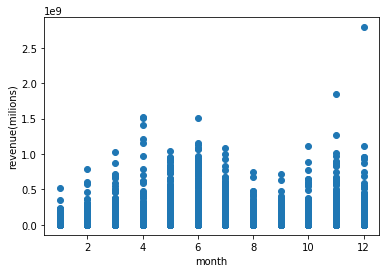

In [19]:
plt.scatter(month,data_reduced['revenue'])
plt.ylabel('revenue(milions)')
plt.xlabel('month')

Text(0.5,1,'scatter plot between vote_average and revenue')

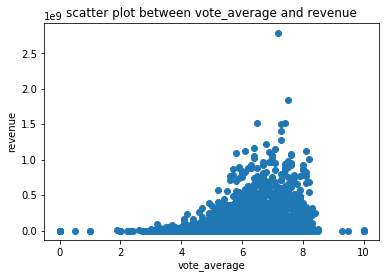

In [20]:
plt.scatter(data_reduced['vote_average'],data_reduced['revenue'])
plt.xlabel('vote_average')
plt.ylabel('revenue')
plt.title('scatter plot between vote_average and revenue')

Text(0.5,1,'scatter plot between budget and revenue')

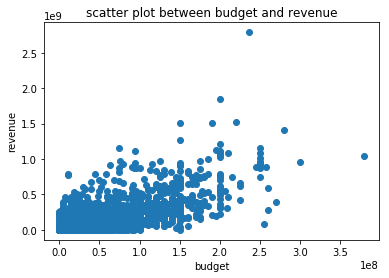

In [21]:
plt.scatter(data_reduced['budget'],data_reduced['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('scatter plot between budget and revenue')

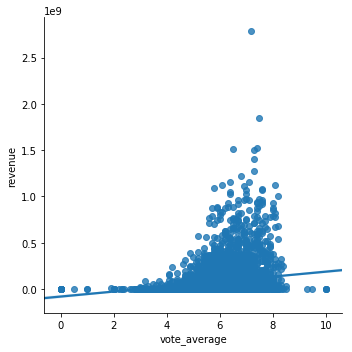

In [22]:
sns.lmplot(x='vote_average', y='revenue',data = data_reduced)

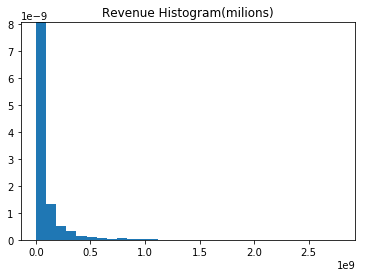

In [23]:
plt.hist(data_reduced['revenue'], normed=True, bins=30)
plt.title('Revenue Histogram(milions)');

In [24]:
data_reduced['revenue'].max()

2787965087

In [25]:
count = 0
for i in data_reduced['revenue']:
    if i == 2787965087:
        count +=1
print(count)

1


In [26]:
np.where(data_reduced['revenue'] == 2787965087)

(array([0]),)

In [ ]:
for genre in liste_genres:
    data_reduced[genre] = data['genres'].str.contains(genre).apply(lambda x:1 if x else 0)
data_reduced[:5]

In [ ]:
""""
plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(5,5))
genre_count = []
for genre in liste_genres:
    genre_count.append([genre, data_reduced[genre].values.sum()])
genre_count.sort(key = lambda x:x[1], reverse = True)
labels, sizes = zip(*genre_count)
labels_selected = [n if v > sum(sizes) * 0.01 else '' for n, v in genre_count]
ax.pie(sizes, labels=labels_selected,
      autopct = lambda x:'{:2.0f}%'.format(x) if x>1 else '',
      shadow = False, startangle=0)
ax.axis('equal')
plt.tight_layout()
"""

In [ ]:
data_list = []*len(liste_genres)
for genre in liste_genres:
    data_list.append(data_reduced.groupby([genre,'release_year']).mean().reset_index())

In [ ]:
data_per_genre = []*len(liste_genres)
for i in range(len(data_list)):
    data_per_genre.append(data_list[i][data_list[i].ix[:,0] == 1])

In [ ]:
columns = range(1988,2018)
budget_genre = pd.DataFrame( columns = columns)
budget_genre

In [ ]:
for genre in liste_genres:
    temp=(data_per_genre[liste_genres.index(genre)].pivot_table(index = genre, columns = 'release_year', values = 'budget', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    budget_genre.loc[liste_genres.index(genre)]=temp
budget_genre['genre']=liste_genres

In [ ]:
budget_genre.index = budget_genre['genre']
budget_genre

In [ ]:
columns = range(1988,2018)
revenue_genre = pd.DataFrame( columns = columns)
revenue_genre

In [ ]:
for genre in liste_genres:
    temp=(data_per_genre[liste_genres.index(genre)].pivot_table(index = genre, columns = 'release_year', values = 'revenue', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    revenue_genre.loc[liste_genres.index(genre)]=temp
revenue_genre['genre']=liste_genres

In [ ]:
revenue_genre.index = revenue_genre['genre']
revenue_genre

In [ ]:
for genre in liste_genres:
    temp=(data_per_genre[liste_genres.index(genre)].pivot_table(index = genre, columns = 'release_year', values = 'vote_average', aggfunc = np.mean))
    temp = temp[temp.columns[-30:]].loc[1]
    vote_avg_genre.loc[liste_genres.index(genre)]=temp
vote_avg_genre['genre']=liste_genres

In [ ]:
vote_avg_genre.index = vote_avg_genre['genre']
vote_avg_genre

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(budget_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(revenue_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(vote_avg_genre.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)

In [ ]:
temp = budget_genre
temp

In [ ]:
temp[2013]=temp[2013].replace(2.550000e+08, 0)

In [ ]:
fig, ax = plt.subplots(figsize=(9,9))
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
sns.heatmap(temp.ix[:,0:30], xticklabels=3, cmap=cmap, linewidths=0.05)